## Exploratory Data Analysis
### Load and Explore a CSV file

EDA
- what features separates winners from losers:
- sns.pairplot(data = df_train, x_vars = df_train.columns[:-1], y_vars = df_train.columns[:-1],
                hue = df_train.columns[-1],plot_kws = {'alpha':.6})

Use the different classifiction methods we learned
- first do stratied Splits
- kNN
- Logistric Regression

Performance Metrics: 
- Confusion Matrix
- Diagnostic Curve
- Multiclass Classifiction Metrics
- Bayes Based Classifiers
- SVM

#### Import necessary libraries

In [634]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load in data file

In [635]:
training_data = pd.read_csv("./data/trainingdata01.csv")

print(training_data.info())

training_data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75863 entries, 0 to 75862
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   battle_id         75863 non-null  int64  
 1   turn              75863 non-null  int64  
 2   total_turn        75863 non-null  int64  
 3   rank              75863 non-null  float64
 4   weather           26767 non-null  object 
 5   field             27283 non-null  object 
 6   condition         12350 non-null  object 
 7   p1_side           9770 non-null   object 
 8   p1a_form          75863 non-null  object 
 9   p1a_hp            75863 non-null  int64  
 10  p1a_ability       75863 non-null  object 
 11  p1a_item          65917 non-null  object 
 12  p1a_move          55606 non-null  object 
 13  p1a_status        11171 non-null  object 
 14  p1a_tera          50558 non-null  object 
 15  p1a_stat_boost    21707 non-null  object 
 16  p1a_status_other  6101 non-null   object

,battle_id,turn,total_turn,rank,weather,field,condition,p1_side,p1a_form,p1a_hp,...,p2c_status,p2c_tera,p2d_form,p2d_hp,p2d_ability,p2d_item,p2d_move,p2d_status,p2d_tera,win
0,2099996083,0,6,1643.5,NaN,Psychic Terrain:4,NaN,NaN,Smeargle,100,...,NaN,unknown,unknown,100,unknown,unknown,unknown,NaN,unknown,0.0
1,2099996083,1,6,1643.5,NaN,Psychic Terrain:3,Trick Room:4,NaN,Smeargle,1,...,NaN,unknown,unknown,100,unknown,unknown,unknown,NaN,unknown,0.0
2,2099996083,2,6,1643.5,SunnyDay:5,Psychic Terrain:2,Trick Room:3,NaN,Torkoal,100,...,NaN,unknown,unknown,100,unknown,unknown,unknown,NaN,unknown,0.0
3,2099996083,3,6,1643.5,SunnyDay:4,Psychic Terrain:1,Trick Room:2,NaN,Torkoal,100,...,fnt,unknown,unknown,100,unknown,unknown,unknown,NaN,unknown,0.0
4,2099996083,4,6,1643.5,SunnyDay:3,Psychic Terrain:0,Trick Room:1,NaN,Torkoal,55,...,fnt,unknown,Urshifu,0,unknown,unknown,"Wicked Blow:3,Detect:4",fnt,unknown,0.0
5,2099996083,5,6,1643.5,SunnyDay:2,NaN,NaN,NaN,Torkoal,0,...,fnt,NaN,Urshifu,0,unknown,unknown,"Wicked Blow:3,Detect:4",fnt,NaN,0.0
6,2099997604,0,8,1596.0,NaN,Psychic Terrain:4,NaN,NaN,Brute Bonnet,100,...,NaN,unknown,unknown,100,unknown,unknown,unknown,NaN,unknown,0.0
7,2099997604,1,8,1596.0,Sandstorm:4,Psychic Terrain:3,NaN,NaN,Brute Bonnet,84,...,NaN,unknown,unknown,100,unknown,unknown,unknown,NaN,unknown,0.0
8,2099997604,2,8,1596.0,Sandstorm:3,Psychic Terrain:2,NaN,NaN,Brute Bonnet,78,...,NaN,unknown,unknown,100,unknown,unknown,unknown,NaN,unknown,0.0
9,2099997604,3,8,1596.0,Sandstorm:2,Psychic Terrain:1,NaN,NaN,Brute Bonnet,34,...,fnt,NaN,Urshifu,100,unknown,unknown,U-turn:19,NaN,NaN,0.0


### Q: Is there an advantage going first?

In [636]:
# who won each match?
    # if 'win' = 1 -> player 1 won
    # if 'win' = 0 -> player 2 won

working_df_copy = training_data.copy()

unique_matches = working_df_copy.drop_duplicates('battle_id')
winner_df = unique_matches[["win"]]

winner_df = winner_df.groupby("win").size().reset_index(name = "counts")
winner_df.win = winner_df.win.replace([0.0, 0.5, 1.0], ['player 2', 'tie', 'player 1'])
winner_df["percent_win"] = round(100*(winner_df["counts"] / winner_df.counts.sum()), 3)

winner_df = winner_df.sort_values("win")
winner_df


,win,counts,percent_win
2,player 1,4938,51.039
0,player 2,4736,48.951
1,tie,1,0.010


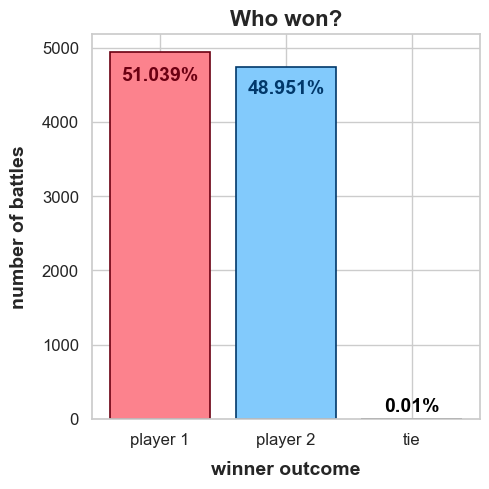

In [637]:
sns.set_style("whitegrid")

plt.figure(figsize = (5,5))

plt.bar(x = winner_df["win"],
        height = winner_df["counts"],
        color = ['#fc828d', '#82cafc', 'gray'],
        edgecolor = ['#6b0012', 'xkcd:marine blue', 'black'],
        linewidth = 1.2)

plt.text(0, 4550, (f"{winner_df.percent_win[2]}%"), c = '#6b0012', fontsize = 14, weight = 'bold', ha = 'center', va = 'baseline')
plt.text(1, 4380, (f"{winner_df.percent_win[0]}%"), c = 'xkcd:marine blue', fontsize = 14, weight = 'bold', ha = 'center', va = 'baseline')
plt.text(2, 100, (f"{winner_df.percent_win[1]}%"), c = 'black', fontsize = 14, weight = 'bold', ha = 'center', va = 'baseline')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.xlabel("winner outcome", fontsize = 14, weight = "bold", labelpad = 10)
plt.ylabel("number of battles", fontsize = 14, weight = "bold", labelpad = 10)
plt.title('Who won?', fontsize = 16, weight = "bold")

plt.savefig('Battle_Winner_Outcome.png', bbox_inches='tight')

plt.show()


Is there an advantage in going first? Possibly but very slight advantage...

### Q: How long is the 'average' battle?

In [638]:
# how many turns does a battle take?

working_df_copy = training_data.copy()

unique_matches = working_df_copy.drop_duplicates('battle_id')
total_turns_df = unique_matches[["battle_id", "total_turn"]]

total_turns_df.total_turn.nunique()
total_turns_df.total_turn.value_counts()
print(f"Most battles last {working_df_copy.total_turn.mode()[0]} turns")

# average battle length
avg_total_turns = total_turns_df.loc[:, 'total_turn'].mean()
print(f"The average length of battle is: {round(avg_total_turns, 3)} turns")

Most battles last 7 turns
The average length of battle is: 7.841 turns


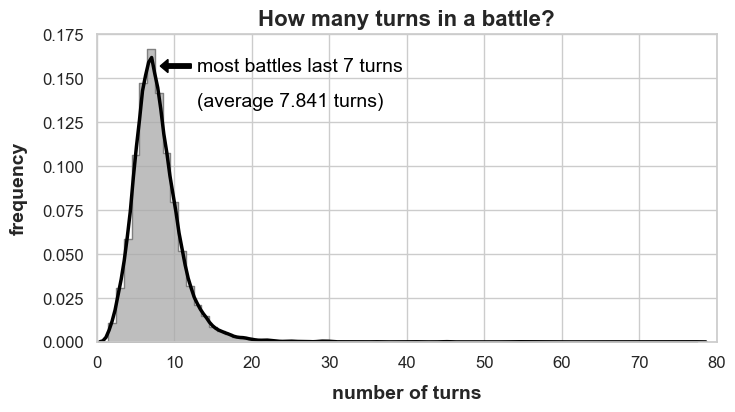

In [639]:
# distribution of total_turns

sns.set_style("whitegrid")

plt.figure(figsize = (8,4))

sns.histplot(x = total_turns_df["total_turn"],
            bins = 75,
            binrange = (0, 77),
            element = 'step',
            color = 'darkgray',
            ec = 'gray',
            discrete = True,
            stat = 'density')

sns.kdeplot(data = total_turns_df,
            x = "total_turn",
            color = 'black',
            linewidth = 2.5)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.xlim(0, 80)
#plt.axvline(x = 7)
plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175])

plt.text(13, 0.154, (f"most battles last {working_df_copy.total_turn.mode()[0]} turns"), c = 'black', fontsize = 14, ha = 'left', va = 'baseline')
plt.arrow(12.2, 0.157, -3, 0.0, color = 'black', width = 0.0025, head_length = 1)

plt.text(13, 0.134, (f"(average {round(avg_total_turns, 3)} turns)"), c = 'black', fontsize = 14, ha = 'left', va = 'baseline')

plt.xlabel("number of turns", fontsize = 14, weight = "bold", labelpad = 10)
plt.ylabel("frequency", fontsize = 14, weight = "bold", labelpad = 10)
plt.title('How many turns in a battle?', fontsize = 16, weight = "bold")

plt.savefig('Total_Turns_per_Battle.png', bbox_inches='tight')

plt.show()



### Q: What Pokemon are frequently on winning vs losing teams?

In [640]:
working_df_copy = training_data.copy()

# 4 pokemon total, abcd
    # a and b are active, c and d are back-ups (unknown until played)
    # once a and b are no longer in play -> become c and d
    # take last 'turn' to see all pokemon played

# all 4 pokemon player 1 played 
    # Apply idxmax() and use .loc() on dataframe to filter the rows with max values:
player1_pokemon = working_df_copy[['battle_id', 'turn', 'p1a_form', 'p1b_form', 'p1c_form', 'p1d_form', 'win']]
player1_all_pokemon = player1_pokemon.loc[player1_pokemon.groupby(["battle_id"])["turn"].idxmax()]

# all 4 pokemon player 2 played 
    # Apply idxmax() and use .loc() on dataframe to filter the rows with max values:
player2_pokemon = working_df_copy[['battle_id', 'turn', 'p2a_form', 'p2b_form', 'p2c_form', 'p2d_form', 'win']]
player2_all_pokemon = player2_pokemon.loc[player2_pokemon.groupby(["battle_id"])["turn"].idxmax()]

#combine p1 + p2 and reorder columns
all_pokemon_played = pd.merge(player1_all_pokemon, player2_all_pokemon)
all_pokemon_played = all_pokemon_played.reindex(columns=['battle_id', 'turn', 'p1a_form', 'p1b_form', 'p1c_form', 'p1d_form',
                                                         'p2a_form', 'p2b_form', 'p2c_form', 'p2d_form', 'win'])
all_pokemon_played

,battle_id,turn,p1a_form,p1b_form,p1c_form,p1d_form,p2a_form,p2b_form,p2c_form,p2d_form,win
0,2099996083,5,Torkoal,Calyrex-Ice,Smeargle,unknown,Torkoal,Calyrex-Ice,Indeedee-F,Urshifu,0.0
1,2099997604,7,Torkoal,Calyrex-Ice,Brute Bonnet,Annihilape,Lycanroc,Tyranitar,Indeedee-F,Urshifu,0.0
2,2100002072,4,Tyranitar,Lycanroc,Tornadus,Urshifu,Torkoal,Calyrex-Ice,Farigiraf,Mienshao,1.0
3,2100002639,10,Iron Jugulis,Miraidon,Gholdengo,Iron Valiant,Indeedee-F,Calyrex-Shadow,Lycanroc,Tyranitar,1.0
4,2100002744,5,Heatran,Calyrex-Ice,Whimsicott,Urshifu,Calyrex-Ice,Urshifu,Annihilape,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9670,2124567455,5,Sandy Shocks,Rillaboom,Incineroar,Groudon,Tornadus,Chi-Yu,Calyrex-Shadow,unknown,0.0
9671,2124567479,7,Ursaluna-Bloodmoon,Zamazenta-Crowned,Urshifu,Ogerpon-Wellspring,Iron Hands,Pelipper,Miraidon,unknown,0.0
9672,2124567998,5,Annihilape,Raichu,Pelipper,Gastrodon,Terapagos-Stellar,Weezing-Galar,Incineroar,Urshifu-Rapid-Strike,0.0
9673,2124569489,5,Torkoal,Exeggutor,Flutter Mane,Tornadus,Groudon,Incineroar,Rillaboom,unknown,0.0


#### Winning pokemons for player 1:

In [641]:
#convert series into long table
player1_long = pd.melt(player1_all_pokemon, id_vars=['battle_id', 'win'], value_vars=['p1a_form', 'p1b_form', 'p1c_form', 'p1d_form'])
p1_winning_mons = player1_long[player1_long['win'] == 1.0].value.value_counts()

p1_winning_mons_df = p1_winning_mons.to_frame().reset_index()

# filter out 'unknown' values and return top 50 pokemon used
p1_winning_mons_df_thresh = p1_winning_mons_df[p1_winning_mons_df['count'] > 79]
p1_winning_mons_df_thresh = p1_winning_mons_df_thresh[p1_winning_mons_df['value'] != 'unknown']

p1_winning_mons_df_thresh


/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_7869/3183820065.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p1_winning_mons_df_thresh = p1_winning_mons_df_thresh[p1_winning_mons_df['value'] != 'unknown']


,value,count
1,Incineroar,932
2,Calyrex-Ice,756
3,Tornadus,702
4,Flutter Mane,696
5,Rillaboom,615
6,Miraidon,586
7,Calyrex-Shadow,577
8,Urshifu-Rapid-Strike,574
9,Amoonguss,484
10,Raging Bolt,464


#### Winning pokemons for player 2:

In [642]:
#convert series into long table
player2_long = pd.melt(player2_all_pokemon, id_vars=['battle_id', 'win'], value_vars=['p2a_form', 'p2b_form', 'p2c_form', 'p2d_form'])
p2_winning_mons = player2_long[player2_long['win'] == 0.0].value.value_counts()

p2_winning_mons_df = p2_winning_mons.to_frame().reset_index()

# filter out 'unknown' values and return top 50 pokemon used
p2_winning_mons_df_thresh = p2_winning_mons_df[p2_winning_mons_df['count'] > 71]
p2_winning_mons_df_thresh = p2_winning_mons_df_thresh[p2_winning_mons_df['value'] != 'unknown']

p2_winning_mons_df_thresh

/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_7869/1971830991.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p2_winning_mons_df_thresh = p2_winning_mons_df_thresh[p2_winning_mons_df['value'] != 'unknown']


,value,count
1,Incineroar,895
2,Calyrex-Ice,759
3,Tornadus,665
4,Flutter Mane,626
5,Miraidon,584
6,Calyrex-Shadow,523
7,Rillaboom,518
8,Urshifu-Rapid-Strike,511
9,Kyogre,428
10,Amoonguss,425


#### Losing pokemons for player 1:

In [643]:
# losing pokemons for player 1

#convert series into long table
player1_long = pd.melt(player1_all_pokemon, id_vars=['battle_id', 'win'], value_vars=['p1a_form', 'p1b_form', 'p1c_form', 'p1d_form'])
p1_losing_mons = player1_long[player1_long['win'] == 0.0].value.value_counts()

p1_losing_mons_df = p1_losing_mons.to_frame().reset_index()

# filter out 'unknown' values and return top 50 pokemon used
p1_losing_mons_df_thresh = p1_losing_mons_df[p1_losing_mons_df['count'] > 83]
p1_losing_mons_df_thresh = p1_losing_mons_df_thresh[p1_losing_mons_df['value'] != 'unknown']

p1_losing_mons_df_thresh

/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_7869/826367203.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p1_losing_mons_df_thresh = p1_losing_mons_df_thresh[p1_losing_mons_df['value'] != 'unknown']


,value,count
0,Incineroar,1041
1,Calyrex-Ice,727
2,Tornadus,668
3,Flutter Mane,659
5,Miraidon,609
6,Calyrex-Shadow,606
7,Rillaboom,590
8,Urshifu-Rapid-Strike,569
9,Amoonguss,486
10,Indeedee-F,434


#### Losing pokemons for player 2:

In [644]:
# losing pokemons for player 2

#convert series into long table
player2_long = pd.melt(player2_all_pokemon, id_vars=['battle_id', 'win'], value_vars=['p2a_form', 'p2b_form', 'p2c_form', 'p2d_form'])
p2_losing_mons = player2_long[player2_long['win'] == 1.0].value.value_counts()

p2_losing_mons_df = p2_losing_mons.to_frame().reset_index()

# filter out 'unknown' values and return top 50 pokemon used
p2_losing_mons_df_thresh = p2_losing_mons_df[p2_losing_mons_df['count'] > 84]
p2_losing_mons_df_thresh = p2_losing_mons_df_thresh[p2_losing_mons_df['value'] != 'unknown']

p2_losing_mons_df_thresh

/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_7869/2598150714.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p2_losing_mons_df_thresh = p2_losing_mons_df_thresh[p2_losing_mons_df['value'] != 'unknown']


,value,count
0,Incineroar,1003
1,Tornadus,731
2,Calyrex-Ice,727
3,Flutter Mane,709
4,Miraidon,654
6,Calyrex-Shadow,642
7,Rillaboom,622
8,Urshifu-Rapid-Strike,615
9,Amoonguss,477
10,Chi-Yu,458


#### Most frequent winning pokemon (regardless of player)

In [645]:
# modify win column for p2 such that win = 1 and lose = 0
player2_long_mod = player2_long
player2_long_mod["win"] = np.where(player2_long_mod["win"] == 0.0, 1.0, 0.0)
player2_long_mod

# RUNNING AGAIN WILL SWITCH BACK TO ORIGINAL FORMAT
    # win = 0.0 and lose = 1.0

,battle_id,win,variable,value
0,2099996083,1.0,p2a_form,Torkoal
1,2099997604,1.0,p2a_form,Lycanroc
2,2100002072,0.0,p2a_form,Torkoal
3,2100002639,0.0,p2a_form,Indeedee-F
4,2100002744,1.0,p2a_form,Calyrex-Ice
...,...,...,...,...
38695,2124567455,1.0,p2d_form,unknown
38696,2124567479,1.0,p2d_form,unknown
38697,2124567998,1.0,p2d_form,Urshifu-Rapid-Strike
38698,2124569489,1.0,p2d_form,unknown


In [646]:
#combine all pokemon from both players to find winning pokemon
all_pkmn_long = pd.concat([player1_long, player2_long_mod],axis=0, ignore_index=True, sort=False)

#convert series into long table
all_winning_pkmn = all_pkmn_long[all_pkmn_long['win'] == 1.0].value.value_counts()
all_winning_pkmn_df = all_winning_pkmn.to_frame().reset_index()

# filter out 'unknown' values and modify count threshold to return top 50 pokemon used
all_winning_pkmn_df_thresh = all_winning_pkmn_df[all_winning_pkmn_df['count'] > 147]
all_winning_pkmn_df_thresh = all_winning_pkmn_df_thresh[all_winning_pkmn_df['value'] != 'unknown']

all_winning_pkmn_df_thresh

/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_7869/684014572.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_winning_pkmn_df_thresh = all_winning_pkmn_df_thresh[all_winning_pkmn_df['value'] != 'unknown']


,value,count
1,Incineroar,1827
2,Calyrex-Ice,1515
3,Tornadus,1367
4,Flutter Mane,1322
5,Miraidon,1170
6,Rillaboom,1133
7,Calyrex-Shadow,1100
8,Urshifu-Rapid-Strike,1085
9,Amoonguss,909
10,Raging Bolt,860


#### Most frequent losing pokemon (regardless of player)

In [647]:
#combine all pokemon from both players to find losing pokemon
all_pkmn_long = pd.concat([player1_long, player2_long_mod],axis=0, ignore_index=True, sort=False)

#convert series into long table
all_losing_pkmn = all_pkmn_long[all_pkmn_long['win'] == 0.0].value.value_counts()
all_losing_pkmn_df = all_losing_pkmn.to_frame().reset_index()

# filter out 'unknown' values and modify count threshold to return top 50 pokemon used
all_losing_pkmn_df_thresh = all_losing_pkmn_df[all_losing_pkmn_df['count'] > 167]
all_losing_pkmn_df_thresh = all_losing_pkmn_df_thresh[all_losing_pkmn_df['value'] != 'unknown']

all_losing_pkmn_df_thresh

/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_7869/3315693511.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_losing_pkmn_df_thresh = all_losing_pkmn_df_thresh[all_losing_pkmn_df['value'] != 'unknown']


,value,count
0,Incineroar,2044
1,Calyrex-Ice,1454
2,Tornadus,1399
3,Flutter Mane,1368
5,Miraidon,1263
6,Calyrex-Shadow,1249
7,Rillaboom,1212
8,Urshifu-Rapid-Strike,1184
9,Amoonguss,963
10,Indeedee-F,890


#### Plots: histrograms of distributions

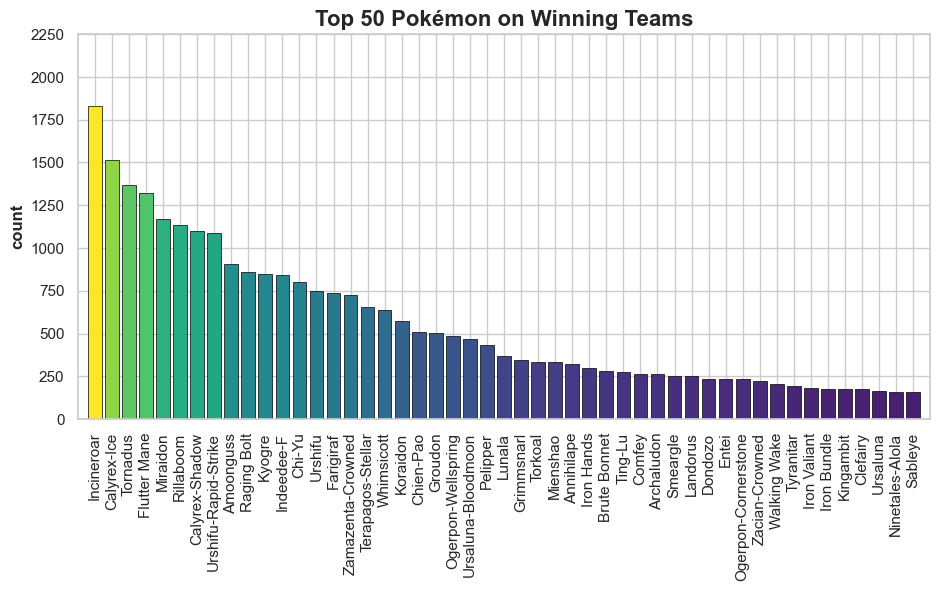

In [648]:
#Plot top 50 Winning Pokemon
y = all_winning_pkmn_df_thresh['count']
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y) / (np.max(y))

# top winning pokemon (player 2)
plt.figure(figsize = (11,5))
plt.bar(all_winning_pkmn_df_thresh['value'],
        all_winning_pkmn_df_thresh['count'],
        edgecolor = 'black',
        linewidth = 0.5,
        color = my_cmap(rescale(y)))

plt.ylim(0, 2250)
plt.xlim(-1, 49)
plt.xticks(rotation = 90)

#plt.xlabel("Pokemon Name", fontsize = 12, weight = 'bold')
plt.ylabel("count", fontsize = 12, weight = 'bold')
plt.title("Top 50 Pokémon on Winning Teams", fontsize = 16, weight = 'bold')

plt.savefig('Top_50_Winning_Pokemon_all.png', bbox_inches='tight')

plt.show()


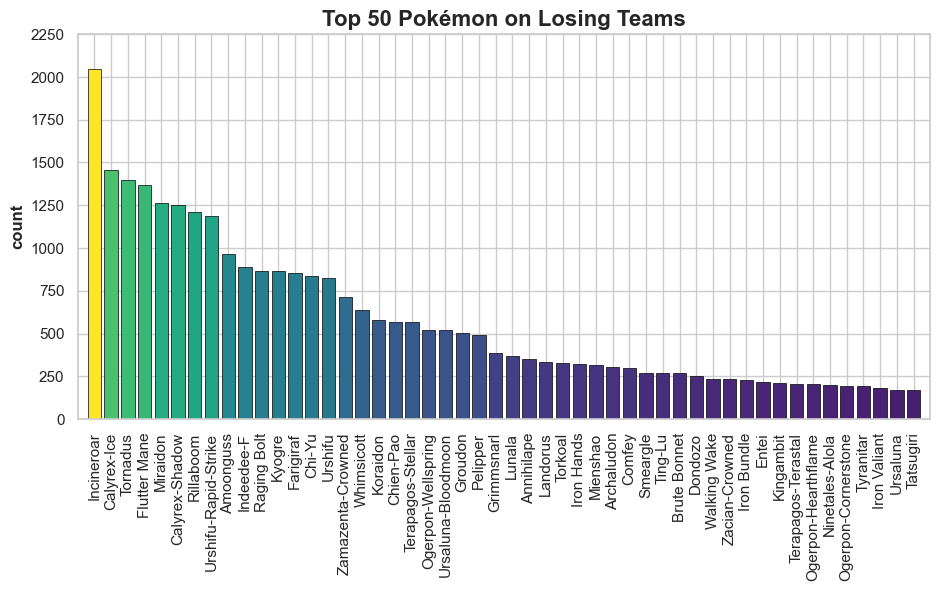

In [649]:
#Plot top 50 Losing Pokemon
y = all_losing_pkmn_df_thresh['count']
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y) / (np.max(y))

# top winning pokemon (player 2)
plt.figure(figsize = (11,5))
plt.bar(all_losing_pkmn_df_thresh['value'],
        all_losing_pkmn_df_thresh['count'],
        edgecolor = 'black',
        linewidth = 0.5,
        color = my_cmap(rescale(y)))

plt.ylim(0, 2250)
plt.xlim(-1, 50)
plt.xticks(rotation = 90)

#plt.xlabel("Pokemon Name", fontsize = 12, weight = 'bold')
plt.ylabel("count", fontsize = 12, weight = 'bold')
plt.title("Top 50 Pokémon on Losing Teams", fontsize = 16, weight = 'bold')

plt.savefig('Top_50_Losing_Pokemon_all.png', bbox_inches='tight')

plt.show()


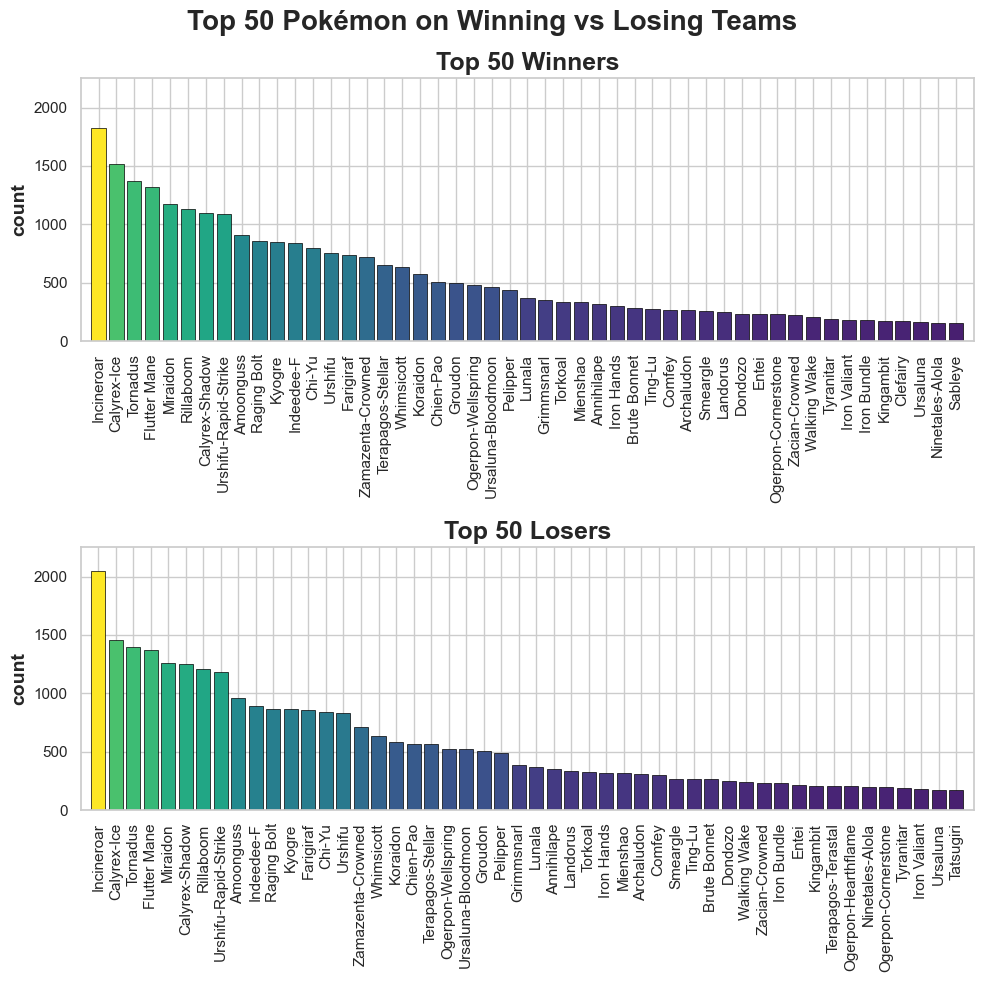

In [650]:
#Combined Plots:

y = all_losing_pkmn_df_thresh['count']
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y) / (np.max(y))

plt.figure(figsize = (10,10))

# winning pokemons
sns.set_style("whitegrid")
ax1 = plt.subplot(2,1,1) 
ax1.bar(all_winning_pkmn_df_thresh['value'],
        all_winning_pkmn_df_thresh['count'],
        edgecolor = 'black',
        linewidth = 0.5,
        color = my_cmap(rescale(y)))

plt.ylim(0, 2250)
plt.xlim(-1, 49)
plt.xticks(rotation = 90)

#plt.xlabel("Pokemon Name", fontsize = 12, weight = 'bold')
plt.ylabel("count", fontsize = 14, weight = 'bold')
plt.title("Top 50 Winners", fontsize = 18, weight = 'bold')
  
# losing pokemons
ax2 = plt.subplot(2,1,2) 
ax2.bar(all_losing_pkmn_df_thresh['value'],
        all_losing_pkmn_df_thresh['count'],
        edgecolor = 'black',
        linewidth = 0.5,
        color = my_cmap(rescale(y)))

plt.ylim(0, 2250)
plt.xlim(-1, 50)
plt.xticks(rotation = 90)

#plt.xlabel("Pokemon Name", fontsize = 12, weight = 'bold')
plt.ylabel("count", fontsize = 14, weight = 'bold')
plt.title("Top 50 Losers", fontsize = 18, weight = 'bold')

plt.suptitle('Top 50 Pokémon on Winning vs Losing Teams', weight = 'bold', fontsize = 20)

plt.tight_layout()

plt.savefig('Top_50_Pokemon_WinvsLose_all.png', bbox_inches = 'tight')

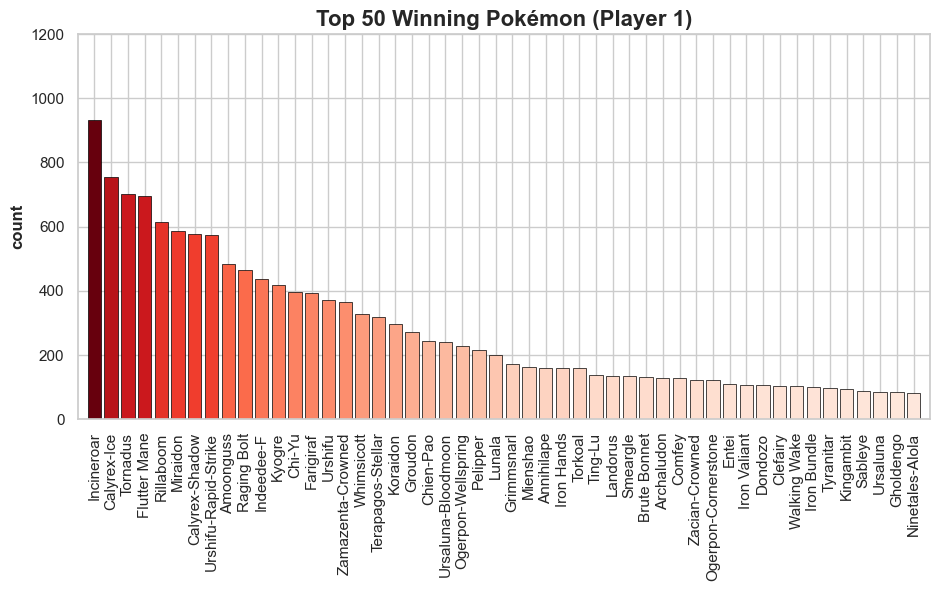

In [651]:
#Plot P1 wnners
y = p1_winning_mons_df_thresh['count']
my_cmap = plt.get_cmap("Reds")
rescale = lambda y: (y) / (np.max(y))

# top winning pokemon (player 2)
plt.figure(figsize = (11,5))
plt.bar(p1_winning_mons_df_thresh['value'],
        p1_winning_mons_df_thresh['count'],
        edgecolor = 'black',
        linewidth = 0.5,
        color = my_cmap(rescale(y)))

plt.ylim(0, 1200)
plt.xlim(-1, 50)
plt.xticks(rotation = 90)

#plt.xlabel("Pokemon Name", fontsize = 12, weight = 'bold')
plt.ylabel("count", fontsize = 12, weight = 'bold')
plt.title("Top 50 Winning Pokémon (Player 1)", fontsize = 16, weight = 'bold')

plt.savefig('Top_50_Winning_Pokemon_Player1.png', bbox_inches='tight')

plt.show()


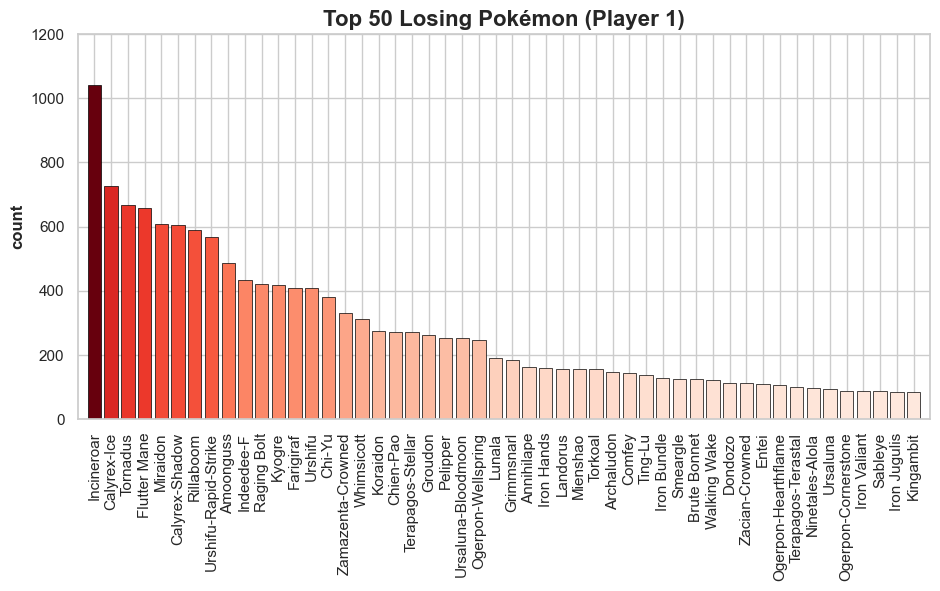

In [652]:
#Plot P1 losers
y = p1_losing_mons_df_thresh['count']
my_cmap = plt.get_cmap("Reds")
rescale = lambda y: (y) / (np.max(y))

# top losing pokemon (player 2)
plt.figure(figsize = (11,5))
plt.bar(p1_losing_mons_df_thresh['value'],
        p1_losing_mons_df_thresh['count'],
        edgecolor = 'black',
        linewidth = 0.5,
        color = my_cmap(rescale(y)))

plt.ylim(0, 1200)
plt.xlim(-1, 50)
plt.xticks(rotation = 90)

#plt.xlabel("Pokemon Name", fontsize = 12, weight = 'bold')
plt.ylabel("count", fontsize = 12, weight = 'bold')
plt.title("Top 50 Losing Pokémon (Player 1)", fontsize = 16, weight = 'bold')

plt.savefig('Top_50_Losing_Pokemon_Player1.png', bbox_inches='tight')

plt.show()

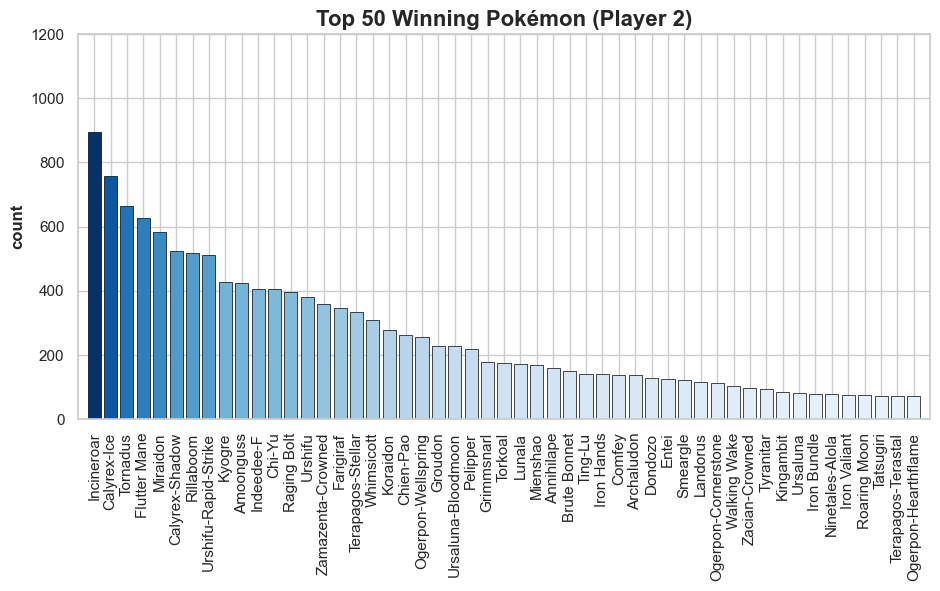

In [653]:
#Plot P2 wnners
y = p2_winning_mons_df_thresh['count']
my_cmap = plt.get_cmap("Blues")
rescale = lambda y: (y) / (np.max(y))

# top winning pokemon (player 2)
plt.figure(figsize = (11,5))
plt.bar(p2_winning_mons_df_thresh['value'],
        p2_winning_mons_df_thresh['count'],
        edgecolor = 'black',
        linewidth = 0.5,
        color = my_cmap(rescale(y)))

plt.ylim(0, 1200)
plt.xlim(-1, 51)
plt.xticks(rotation = 90)

#plt.xlabel("Pokemon Name", fontsize = 12, weight = 'bold')
plt.ylabel("count", fontsize = 12, weight = 'bold')
plt.title("Top 50 Winning Pokémon (Player 2)", fontsize = 16, weight = 'bold')

plt.savefig('Top_50_Winning_Pokemon_Player2_.png', bbox_inches='tight')

plt.show()


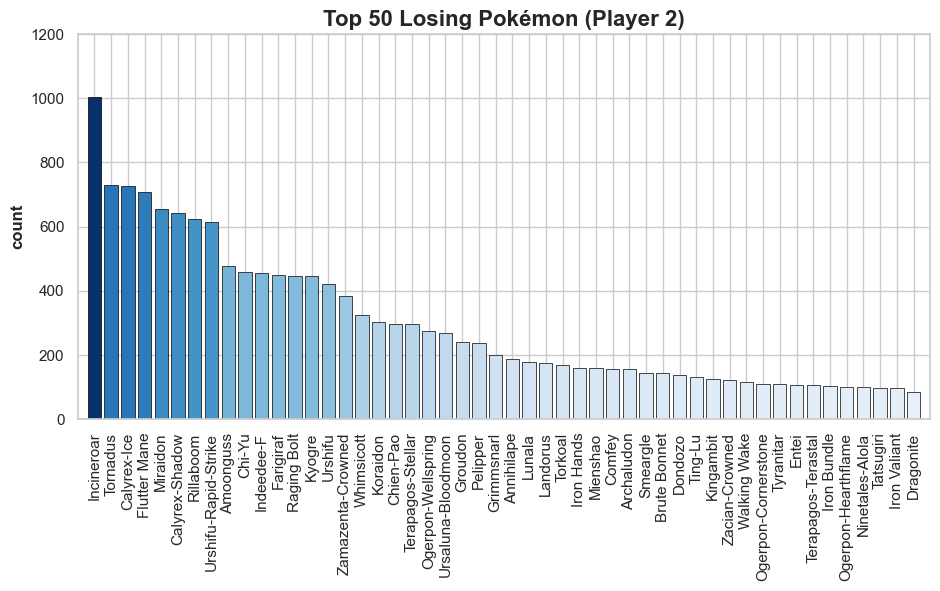

In [654]:
#Plot P2 losers
y = p2_losing_mons_df_thresh['count']
my_cmap = plt.get_cmap("Blues")
rescale = lambda y: (y) / (np.max(y))

# top losing pokemon (player 2)
plt.figure(figsize = (11,5))
plt.bar(p2_losing_mons_df_thresh['value'],
        p2_losing_mons_df_thresh['count'],
        edgecolor = 'black',
        linewidth = 0.5,
        color = my_cmap(rescale(y)))

plt.ylim(0, 1200)
plt.xlim(-1, 50)
plt.xticks(rotation = 90)

#plt.xlabel("Pokemon Name", fontsize = 12, weight = 'bold')
plt.ylabel("count", fontsize = 12, weight = 'bold')
plt.title("Top 50 Losing Pokémon (Player 2)", fontsize = 16, weight = 'bold')

plt.savefig('Top_50_Losing_Pokemon_Player2.png', bbox_inches='tight')

plt.show()

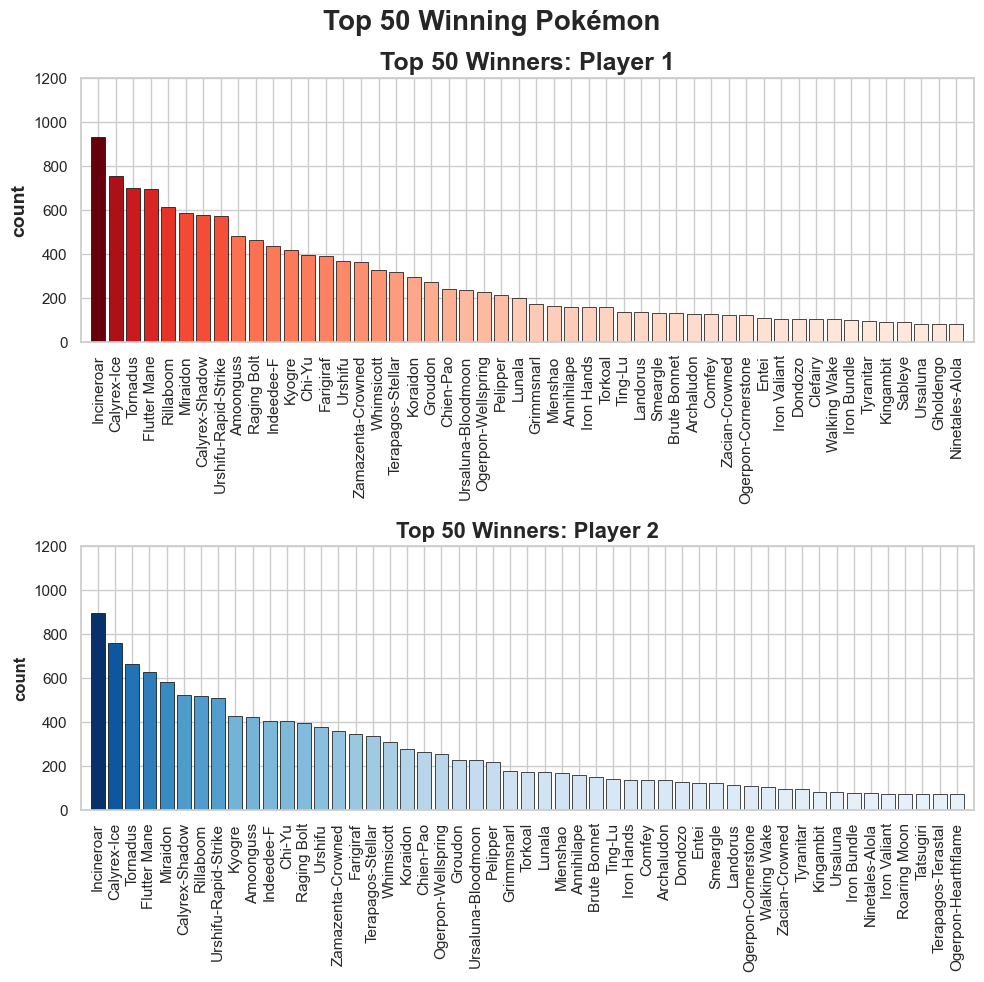

In [655]:
# Combine Winners
y = p1_winning_mons_df_thresh['count']
my_cmap_R = plt.get_cmap("Reds")
rescale_red = lambda y: (y) / (np.max(y))

y = p2_winning_mons_df_thresh['count']
my_cmap_B = plt.get_cmap("Blues")
rescale_blue = lambda y: (y) / (np.max(y))

plt.figure(figsize = (10,10))

# winning pokemons p1
sns.set_style("whitegrid")
ax1 = plt.subplot(2,1,1) 
ax1.bar(p1_winning_mons_df_thresh['value'],
        p1_winning_mons_df_thresh['count'],
        edgecolor = 'black',
        linewidth = 0.5,
        color = my_cmap_R(rescale_red(y)))

plt.ylim(0, 1200)
plt.xlim(-1, 50)
plt.xticks(rotation = 90)

#plt.xlabel("Pokemon Name", fontsize = 12, weight = 'bold')
plt.ylabel("count", fontsize = 14, weight = 'bold')
plt.title("Top 50 Winners: Player 1", fontsize = 18, weight = 'bold')
  
# winning pokemons p2
ax2 = plt.subplot(2,1,2) 
ax2.bar(p2_winning_mons_df_thresh['value'],
        p2_winning_mons_df_thresh['count'],
        edgecolor = 'black',
        linewidth = 0.5,
        color = my_cmap_B(rescale_blue(y)))

plt.ylim(0, 1200)
plt.xlim(-1, 51)
plt.xticks(rotation = 90)

#plt.xlabel("Pokemon Name", fontsize = 12, weight = 'bold')
plt.ylabel("count", fontsize = 12, weight = 'bold')
plt.title("Top 50 Winners: Player 2", fontsize = 16, weight = 'bold')

plt.suptitle('Top 50 Winning Pokémon', weight = 'bold', fontsize = 20)

plt.tight_layout()

plt.savefig('Top_50_Pokemon_Winners.png', bbox_inches = 'tight')

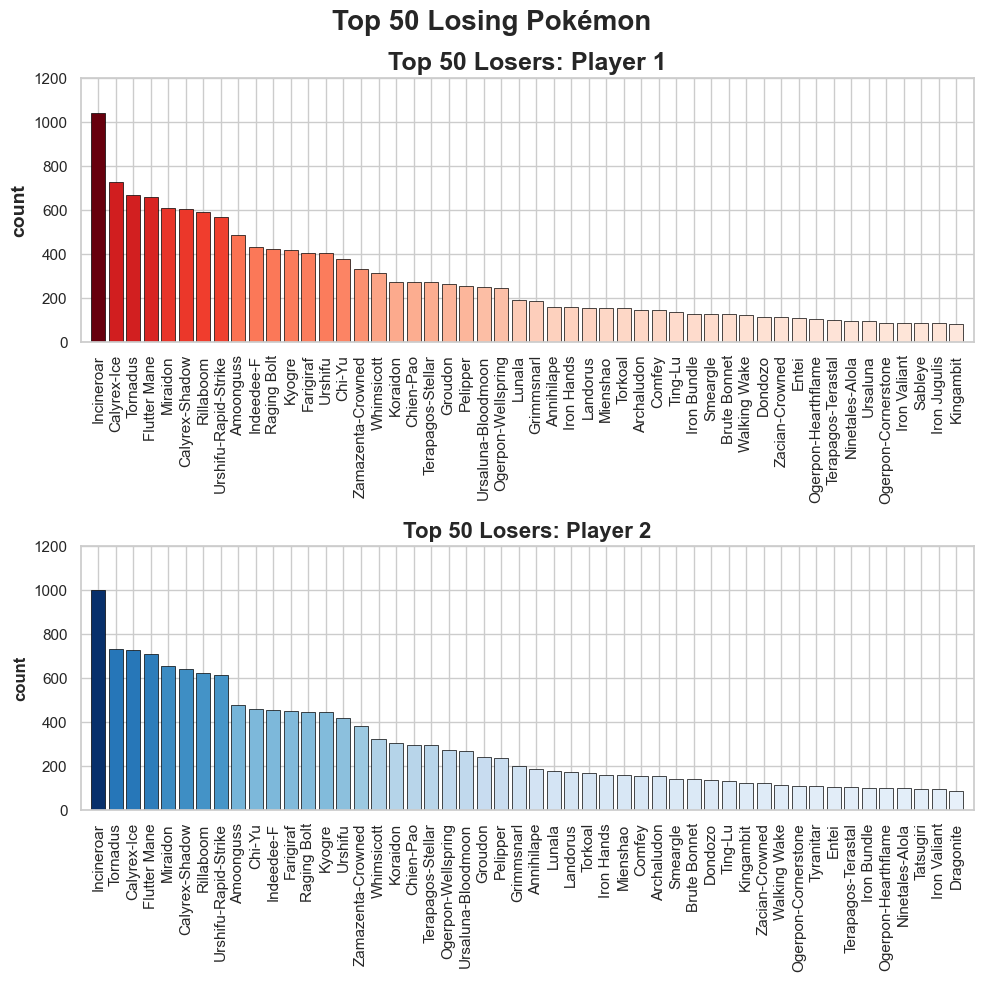

In [656]:
# Combine Losers
y = p1_losing_mons_df_thresh['count']
my_cmap_R = plt.get_cmap("Reds")
rescale_red = lambda y: (y) / (np.max(y))

y = p2_losing_mons_df_thresh['count']
my_cmap_B = plt.get_cmap("Blues")
rescale_blue = lambda y: (y) / (np.max(y))

plt.figure(figsize = (10,10))

# losing pokemons p1
sns.set_style("whitegrid")
ax1 = plt.subplot(2,1,1) 
ax1.bar(p1_losing_mons_df_thresh['value'],
        p1_losing_mons_df_thresh['count'],
        edgecolor = 'black',
        linewidth = 0.5,
        color = my_cmap_R(rescale_red(y)))

plt.ylim(0, 1200)
plt.xlim(-1, 50)
plt.xticks(rotation = 90)

#plt.xlabel("Pokemon Name", fontsize = 12, weight = 'bold')
plt.ylabel("count", fontsize = 14, weight = 'bold')
plt.title("Top 50 Losers: Player 1", fontsize = 18, weight = 'bold')
  
# losing pokemons p2
ax2 = plt.subplot(2,1,2) 
ax2.bar(p2_losing_mons_df_thresh['value'],
        p2_losing_mons_df_thresh['count'],
        edgecolor = 'black',
        linewidth = 0.5,
        color = my_cmap_B(rescale_blue(y)))

plt.ylim(0, 1200)
plt.xlim(-1, 50)
plt.xticks(rotation = 90)

#plt.xlabel("Pokemon Name", fontsize = 12, weight = 'bold')
plt.ylabel("count", fontsize = 12, weight = 'bold')
plt.title("Top 50 Losers: Player 2", fontsize = 16, weight = 'bold')

plt.suptitle('Top 50 Losing Pokémon', weight = 'bold', fontsize = 20)

plt.tight_layout()

plt.savefig('Top_50_Pokemon_Losers.png', bbox_inches = 'tight')


### Q: What is the ditrubtion of all pokemon type combinations?

In [657]:
#load in pokemon stat dataset
import json
 
# Opening JSON file
f = open('./data/pokedex.json')
 
# returns JSON object as a dictionary
pokedex_json = json.load(f)


pokemon_stat_type_info = pd.read_csv("./data/Pokemon_Stats_Type_info.csv")

print(pokemon_stat_type_info.info())
pokemon_stat_type_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Pokedex_ID   1246 non-null   int64 
 1   Name         1246 non-null   object
 2   Type1        1246 non-null   object
 3   Type2        683 non-null    object
 4   Total_Stats  1246 non-null   int64 
 5   HP           1246 non-null   int64 
 6   Attack       1246 non-null   int64 
 7   Defense      1246 non-null   int64 
 8   SpAtk        1246 non-null   int64 
 9   SpDef        1246 non-null   int64 
 10  Speed        1246 non-null   int64 
 11  Generation   1246 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 116.9+ KB
None


,Pokedex_ID,Name,Type1,Type2,Total_Stats,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1241,1023,Iron Crown,Steel,Psychic,590,90,72,100,122,108,98,9
1242,1024,Terapagos,Normal,NaN,450,90,65,85,65,85,60,9
1243,1024,Terapagos-Terastal,Normal,NaN,600,95,95,110,105,110,85,9
1244,1024,Terapagos-Stellar,Normal,NaN,700,160,105,110,130,110,85,9


#### Count all possible Type1-Type2 combinations
If a pokemon is mono-type, set `Type2` = `Type1`

In [658]:
#counting all typing combinations

type_df = pokemon_stat_type_info.copy()
type_df = type_df[['Type1', 'Type2']]

#if a pokemon has a single type, type 2 = type 1
type_df['Type2'] = type_df['Type2'].fillna(value = type_df['Type1'], inplace=False)

#counting all type1+2 combinations
type_df = type_df[['Type1', 'Type2']].groupby(['Type1', 'Type2']).size().reset_index()
type_df.columns = ['Type1', 'Type2', 'count']

#combind reciprocal combinations (ie: total value for Bug-Dark + Dark-Bug)
type_df['Type1a'] = type_df.apply(lambda row: min(row['Type1'], row['Type2']), axis = 1)
type_df['Type2a'] = type_df.apply(lambda row: max(row['Type1'], row['Type2']), axis = 1)

type_df2 = type_df.groupby(['Type1a', 'Type2a'])['count'].sum().reset_index()

type_df2.head(50)

type_pivoted_df = type_df2.pivot_table(columns = 'Type1a', index = 'Type2a', values = 'count')
type_pivoted_df

Type1a,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type2a,,,,,,,,,,,,,,,,,,
Bug,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dark,1.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dragon,NaN,5.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electric,4.0,2.0,5.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fairy,2.0,3.0,1.0,2.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fighting,5.0,4.0,3.0,3.0,1.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire,4.0,5.0,4.0,1.0,NaN,8.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flying,16.0,8.0,8.0,8.0,4.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ghost,1.0,3.0,5.0,1.0,3.0,2.0,8.0,3.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Plot: Typing Combinations frequencies

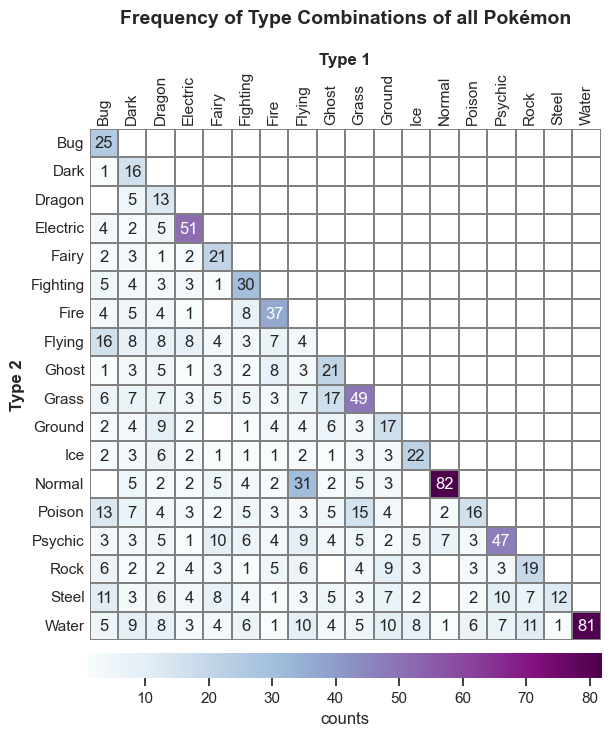

In [659]:
sns.set_theme(style="white")
plt.subplots(figsize=(8,8))
ax = sns.heatmap(type_pivoted_df, annot=True, square=True, cmap='BuPu',
                 linecolor='gray', linewidths='0.05',
                 cbar_kws={'shrink': 0.83,'label': 'counts', 'location': 'bottom', 'pad': 0.02})

ax.xaxis.tick_top()
plt.tick_params(length = 0)
plt.xticks(rotation = 90) 
ax.xaxis.set_label_position('top') 

plt.xlabel('Type 1', weight = "bold")
plt.ylabel('Type 2', weight = "bold")

plt.title('Frequency of Type Combinations of all Pokémon\n', fontsize = 14, weight = "bold")

plt.savefig('Typing_Combinations.png', bbox_inches = 'tight')

plt.show()

### Q: Are there any correlations between certain pokemon stats?

#### Plot: correlation between all 6 stats

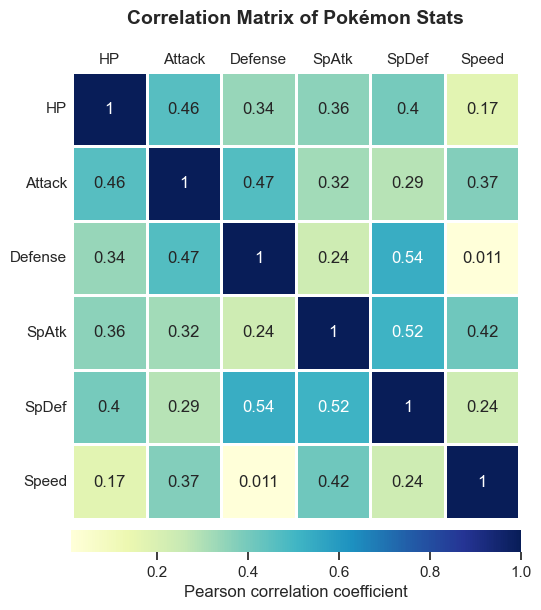

In [660]:
stats_corr_df = pokemon_stat_type_info.copy()

stats_corr_df = stats_corr_df[['HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed']]

stats_corr_df.corr


sns.set_theme(style="white")
plt.subplots(figsize=(7,7))
ax = sns.heatmap(stats_corr_df.corr(), annot = True, square=True, cmap = "YlGnBu",
                 linecolor='white', linewidth = 1,
                 cbar_kws={'shrink': 0.83,'label': 'Pearson correlation coefficient', 'location': 'bottom', 'pad': 0.02})           

ax.xaxis.tick_top()
plt.tick_params(length = 0)
plt.yticks(rotation = 0) 
ax.xaxis.set_label_position('top') 

plt.title('Correlation Matrix of Pokémon Stats\n', fontsize = 14, weight = "bold")

plt.savefig('Stat_Correlation_Matrix.png', bbox_inches = 'tight')

plt.show()


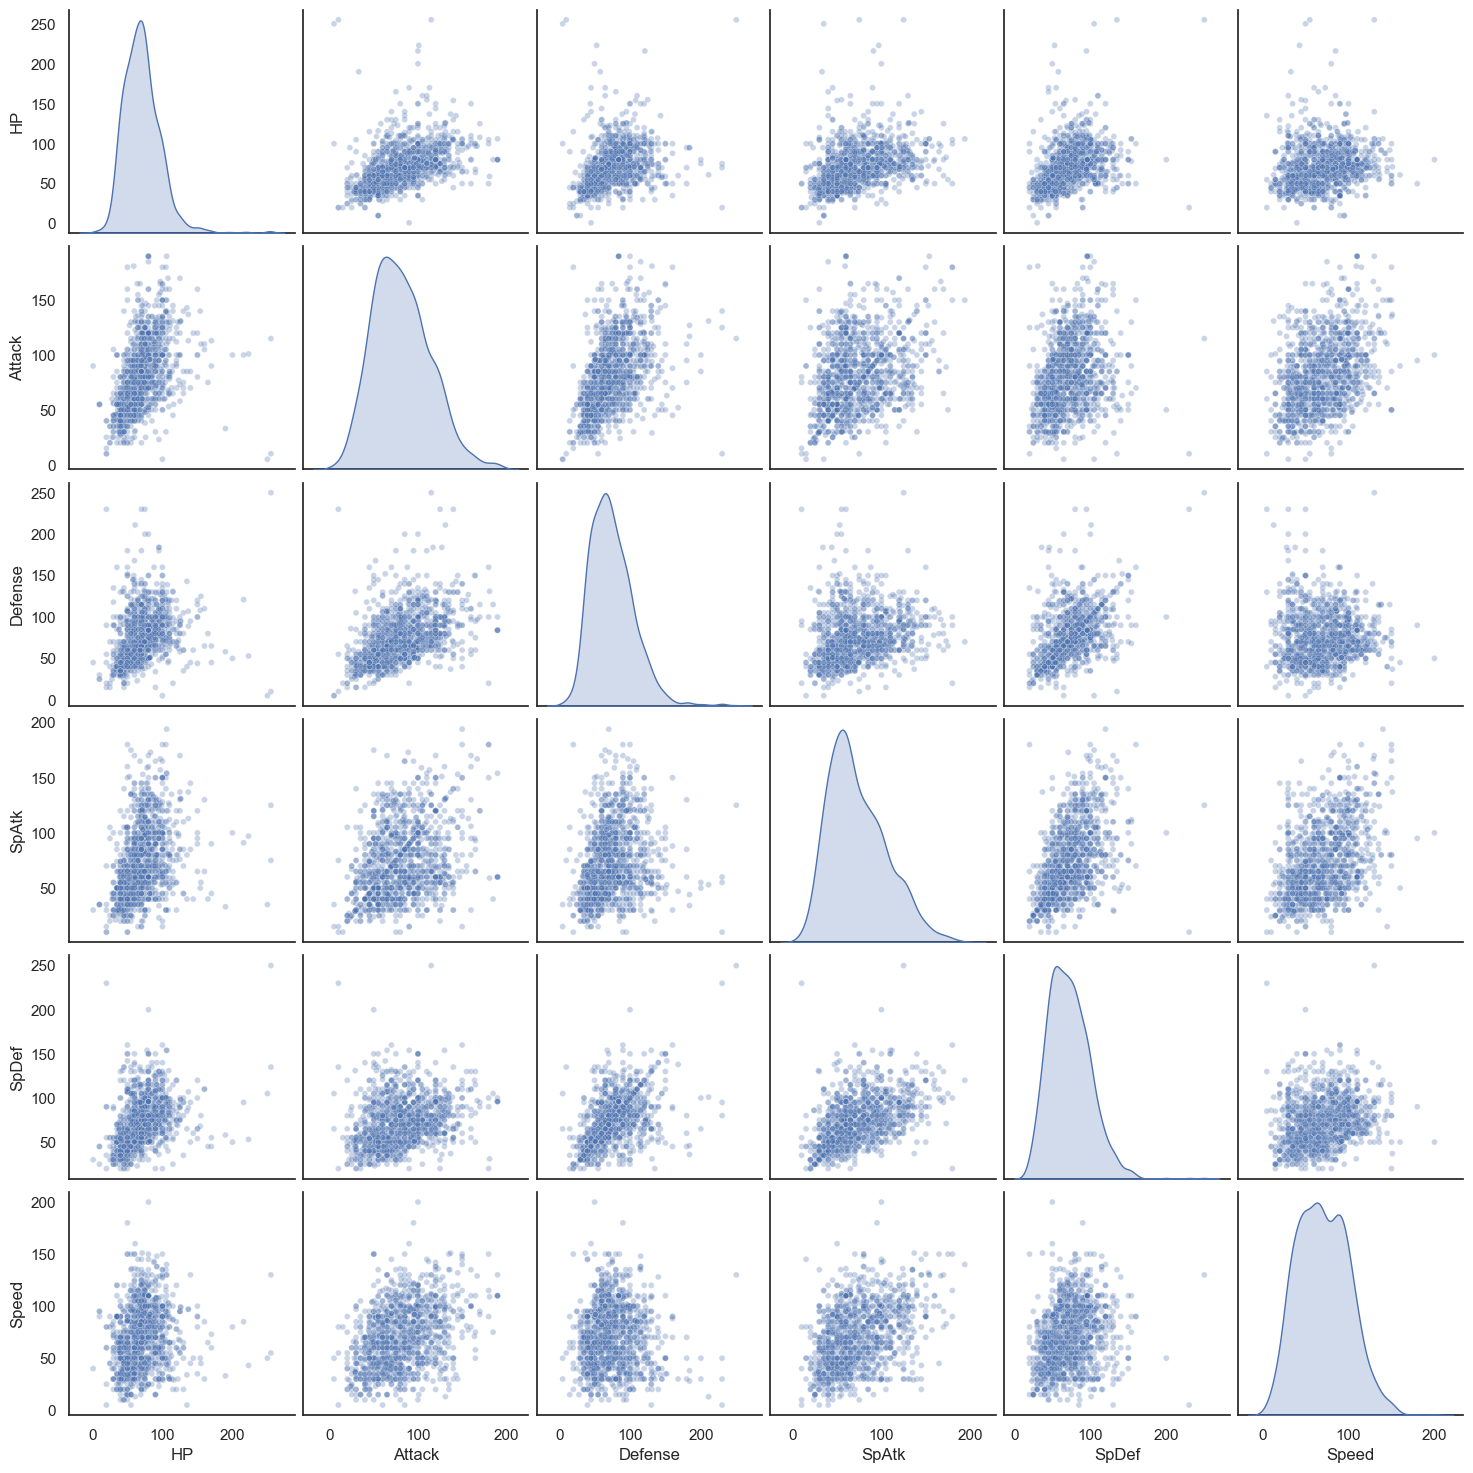

In [676]:
#pairplot of stats for all pokemon:
sns.pairplot(data = stats_df, x_vars = stats_df.columns[1:7], y_vars = stats_df.columns[1:7], diag_kind="kde",
             plot_kws = {'alpha':0.3, 'ec':'white', 'size':10})

#### What are the stats for the top 100 winning pokemnon?
<i>Compare the distribution of stats relative to one another</i>

Stat Comparisions
- Attack vs Defense
- SpAtk vs SpDef
- Total At vs Total Def (Total Power)
- Speed Distribution
- Physical Sweeper vs Special Sweeper
    - Physical Sweeper = Attack + Speed
    - Special Sweeper = Sp. Atk + Speed
- Physical Tank vs Special Tank
    - Physical Tank = Attack + Defense
    - Special Tank = Sp. Atk + Sp. Def

In [661]:
#Format stats table:

stats_df = pokemon_stat_type_info[['Pokedex_ID', 'HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed', 'Total_Stats']]
stats_df

stats_df['Total_Attack'] = stats_df['Attack'] + stats_df['SpAtk']
stats_df['Total_Defense'] = stats_df['Defense'] + stats_df['SpDef']

stats_df['Physical_Sweeper'] = stats_df['Attack'] + stats_df['Speed']
stats_df['Special_Sweeper'] = stats_df['SpAtk'] + stats_df['Speed']

stats_df['Physical_Tank'] = stats_df['Attack'] + stats_df['Defense']
stats_df['Special_Tank'] = stats_df['SpAtk'] + stats_df['SpDef']

stats_df['Total_Power'] = stats_df['Attack'] + stats_df['Defense'] + stats_df['SpAtk'] + stats_df['SpDef'] + stats_df['Speed']

stats_df


/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_7869/3779838231.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df['Total_Attack'] = stats_df['Attack'] + stats_df['SpAtk']
/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_7869/3779838231.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df['Total_Defense'] = stats_df['Defense'] + stats_df['SpDef']
/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_7869/3779838231.py:9: SettingWithCopyWarning: 
A value is trying 

,Pokedex_ID,HP,Attack,Defense,SpAtk,SpDef,Speed,Total_Stats,Total_Attack,Total_Defense,Physical_Sweeper,Special_Sweeper,Physical_Tank,Special_Tank,Total_Power
0,1,45,49,49,65,65,45,318,114,114,94,110,98,130,273
1,2,60,62,63,80,80,60,405,142,143,122,140,125,160,345
2,3,80,82,83,100,100,80,525,182,183,162,180,165,200,445
3,4,39,52,43,60,50,65,309,112,93,117,125,95,110,270
4,5,58,64,58,80,65,80,405,144,123,144,160,122,145,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,1023,90,72,100,122,108,98,590,194,208,170,220,172,230,500
1242,1024,90,65,85,65,85,60,450,130,170,125,125,150,150,360
1243,1024,95,95,110,105,110,85,600,200,220,180,190,205,215,505
1244,1024,160,105,110,130,110,85,700,235,220,190,215,215,240,540


In [662]:
#Finding the top 100 winning pokemon:
wokring_df_copy = all_winning_pkmn_df.copy()
wokring_df_copy


# filter out 'unknown' values and modify count threshold to return top 100 pokemon used
frequent_winners_df_thresh = wokring_df_copy[wokring_df_copy['count'] > 47]
frequent_winners_df_thresh = frequent_winners_df_thresh[wokring_df_copy['value'] != 'unknown']

frequent_winners_df_thresh.rename(columns={"value": "Name"}, inplace=True)
frequent_winners_df_thresh

/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_7869/112609605.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frequent_winners_df_thresh = frequent_winners_df_thresh[wokring_df_copy['value'] != 'unknown']


,Name,count
1,Incineroar,1827
2,Calyrex-Ice,1515
3,Tornadus,1367
4,Flutter Mane,1322
5,Miraidon,1170
...,...,...
96,Mimikyu-Busted,49
97,Ogerpon,49
98,Venusaur,48
99,Latios,48


In [663]:
#merge the stats into the top100 df + stat combinations
pokemon_info_df = pokemon_stat_type_info[['Name', 'HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed', 'Total_Stats']]
pokemon_info_df

top100_winners_stats = pd.merge(frequent_winners_df_thresh, pokemon_info_df, how = 'inner', on = ['Name'])


top100_winners_stats['Total_Attack'] = top100_winners_stats['Attack'] + top100_winners_stats['SpAtk']
top100_winners_stats['Total_Defense'] = top100_winners_stats['Defense'] + top100_winners_stats['SpDef']

top100_winners_stats['Physical_Sweeper'] = top100_winners_stats['Attack'] + top100_winners_stats['Speed']
top100_winners_stats['Special_Sweeper'] = top100_winners_stats['SpAtk'] + top100_winners_stats['Speed']

top100_winners_stats['Physical_Tank'] = top100_winners_stats['Attack'] + top100_winners_stats['Defense']
top100_winners_stats['Special_Tank'] = top100_winners_stats['SpAtk'] + top100_winners_stats['SpDef']

top100_winners_stats['Total_Power'] = top100_winners_stats['Attack'] + top100_winners_stats['Defense'] + top100_winners_stats['SpAtk'] + top100_winners_stats['SpDef'] + top100_winners_stats['Speed']

top100_winners_stats

,Name,count,HP,Attack,Defense,SpAtk,SpDef,Speed,Total_Stats,Total_Attack,Total_Defense,Physical_Sweeper,Special_Sweeper,Physical_Tank,Special_Tank,Total_Power
0,Incineroar,1827,95,115,90,80,90,60,530,195,180,175,140,205,170,435
1,Calyrex-Ice,1515,100,165,150,85,130,50,680,250,280,215,135,315,215,580
2,Tornadus,1367,79,115,70,125,80,111,580,240,150,226,236,185,205,501
3,Flutter Mane,1322,55,55,55,135,135,135,570,190,190,190,270,110,270,515
4,Miraidon,1170,100,85,100,135,115,135,670,220,215,220,270,185,250,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mimikyu-Busted,49,55,90,80,50,105,96,476,140,185,186,146,170,155,421
96,Ogerpon,49,80,120,84,60,96,110,550,180,180,230,170,204,156,470
97,Venusaur,48,80,82,83,100,100,80,525,182,183,162,180,165,200,445
98,Latios,48,80,90,80,130,110,110,600,220,190,200,240,170,240,520


#### Plots: 

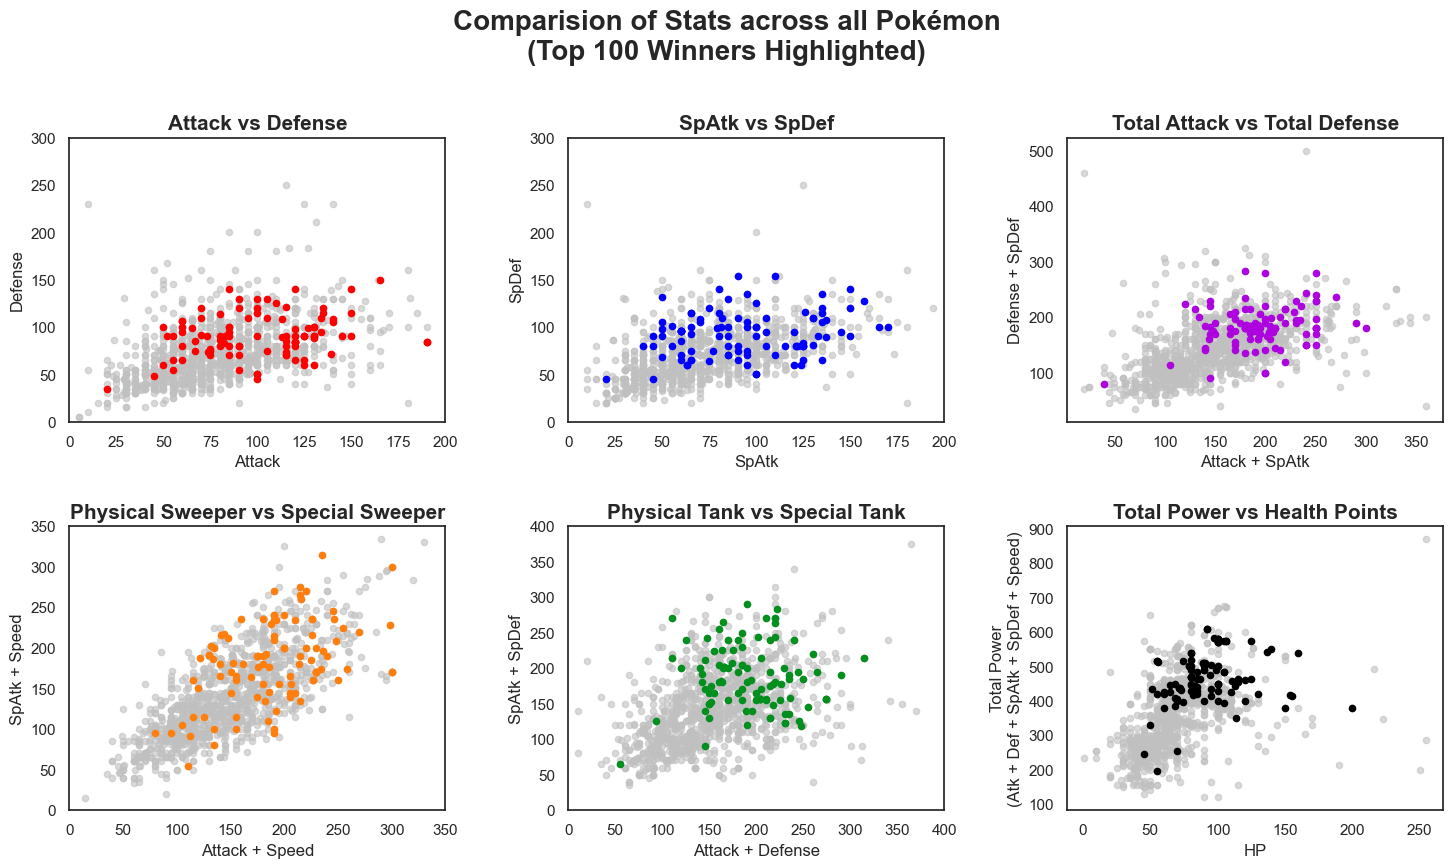

In [664]:
figure, axis = plt.subplots(2, 3, figsize=(15, 9))
  
# Attack vs Defense
axis[0, 0].scatter(stats_df['Attack'], stats_df['Defense'], alpha = 0.6, color = 'silver', s = 20) 
axis[0, 0].scatter(top100_winners_stats['Attack'], top100_winners_stats['Defense'], alpha = 1, color = 'red', s = 20) 
axis[0, 0].set_title("Attack vs Defense", weight = 'bold', fontsize = 15) 
axis[0, 0].set_xlim(0, 200)
axis[0, 0].set_ylim(0, 300)
axis[0, 0].set_xlabel("Attack")
axis[0, 0].set_ylabel("Defense")
  
# SpAtk vs SpDef 
axis[0, 1].scatter(stats_df['SpAtk'], stats_df['SpDef'], alpha = 0.6, color = 'silver', s = 20)
axis[0, 1].scatter(top100_winners_stats['SpAtk'], top100_winners_stats['SpDef'], alpha = 1, color = 'blue', s = 20)  
axis[0, 1].set_title("SpAtk vs SpDef", weight = 'bold', fontsize = 15)
axis[0, 1].set_xlim(0, 200)
axis[0, 1].set_ylim(0, 300)
axis[0, 1].set_xlabel("SpAtk")
axis[0, 1].set_ylabel("SpDef")

# Total Atk vs Total Def 
axis[0, 2].scatter(stats_df['Total_Attack'], stats_df['Total_Defense'], alpha = 0.6, color = 'silver', s = 20) 
axis[0, 2].scatter(top100_winners_stats['Total_Attack'], top100_winners_stats['Total_Defense'], alpha = 1, color = 'xkcd:vibrant purple', s = 20) 
axis[0, 2].set_title("Total Attack vs Total Defense", weight = 'bold', fontsize = 15)
#axis[0, 2].set_xlim(0, 200)
#axis[0, 2].set_ylim(0, 300)
axis[0, 2].set_xlabel("Attack + SpAtk")
axis[0, 2].set_ylabel("Defense + SpDef")


# Physical Sweeper vs Special Sweeper
axis[1, 0].scatter(stats_df['Physical_Sweeper'], stats_df['Special_Sweeper'], alpha = 0.6, color = 'silver', s = 20) 
axis[1, 0].scatter(top100_winners_stats['Physical_Sweeper'], top100_winners_stats['Special_Sweeper'], alpha = 1, color = 'tab:orange', s = 20)   
axis[1, 0].set_title("Physical Sweeper vs Special Sweeper", weight = 'bold', fontsize = 15)
axis[1, 0].set_xlim(0, 350)
axis[1, 0].set_ylim(0, 350)
axis[1, 0].set_xlabel("Attack + Speed")
axis[1, 0].set_ylabel("SpAtk + Speed")

# Physical Tank vs Special Tank 
axis[1, 1].scatter(stats_df['Physical_Tank'], stats_df['Special_Tank'], alpha = 0.6, color = 'silver', s = 20) 
axis[1, 1].scatter(top100_winners_stats['Physical_Tank'], top100_winners_stats['Special_Tank'], alpha = 1, color = 'xkcd:emerald green', s = 20) 
axis[1, 1].set_title("Physical Tank vs Special Tank", weight = 'bold', fontsize = 15) 
axis[1, 1].set_xlim(0, 400)
axis[1, 1].set_ylim(0, 400)
axis[1, 1].set_xlabel("Attack + Defense")
axis[1, 1].set_ylabel("SpAtk + SpDef")

# Speed distribution
axis[1, 2].scatter(stats_df['HP'], stats_df['Total_Power'], alpha = 0.6, color = 'silver', s = 20)
axis[1, 2].scatter(top100_winners_stats['HP'], top100_winners_stats['Total_Power'], alpha = 1, color = 'black', s = 20)   
axis[1, 2].set_title("Total Power vs Health Points", weight = 'bold', fontsize = 15)
#axis[1, 2].set_ylim(0, 250)
axis[1, 2].set_xlabel("HP")
axis[1, 2].set_ylabel("Total Power\n(Atk + Def + SpAtk + SpDef + Speed)")

plt.suptitle('Comparision of Stats across all Pokémon\n(Top 100 Winners Highlighted)', weight = 'bold', fontsize = 20)

figure.tight_layout(pad = 2.0)

plt.savefig('Stat_Comparisions_Top100.png', bbox_inches = 'tight')

EDA
- what features separates winners from losers:
- sns.pairplot(data = df_train, x_vars = df_train.columns[:-1], y_vars = df_train.columns[:-1],
                hue = df_train.columns[-1],plot_kws = {'alpha':.6})

Use the different classifiction methods we learned
- first do stratied Splits
- kNN
- Logistric Regression

Performance Metrics: 
- Confusion Matrix
- Diagnostic Curve
- Multiclass Classifiction Metrics
- Bayes Based Classifiers
- SVM

#### Where do the top pokemon fall?